In [22]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

import statsmodels.api as sm

Text(0.5,1,' Logistic Function ')

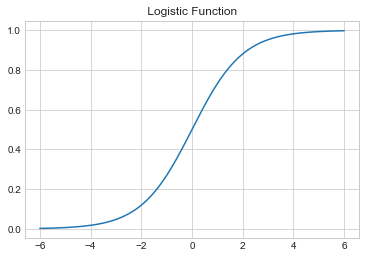

In [23]:
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

t = np.linspace(-6,6,500)

y = np.array([logistic(ele) for ele in t])

plt.plot(t,y)
plt.title(' Logistic Function ')

In [24]:
data = pd.read_excel("data.xlsx")

In [25]:
data.head()

,Life Expectancy,Accidental Deaths,Alzheimer's,Assault,Cerebrovascular Diseases,Chronic Liver,Chronic Lower Respiratory,Diabetes,Heart Diseases,Hypertension,Parkinson's,Suicide
0,76.7,97860,44536,16889,167366,26259,124181,68399,725192,19638,14593,29199
1,76.8,97900,49558,16765,167661,26552,122009,69301,710760,18073,15682,29350
2,77.0,101537,53832,20308,163538,27035,123013,71372,700142,19250,16544,30622
3,77.0,106742,58866,17638,162672,27257,124816,73249,696947,20261,16959,31655
4,77.6,109277,63457,17732,157689,27503,126382,74219,685089,21940,17997,31484


In [26]:
def check(x):
    if x > 650000:
        return 1
    else:
        return 0
    
data['Heart_Diseases_Effectiveness'] = data['Heart Diseases'].apply(check)

In [27]:
data

,Life Expectancy,Accidental Deaths,Alzheimer's,Assault,Cerebrovascular Diseases,Chronic Liver,Chronic Lower Respiratory,Diabetes,Heart Diseases,Hypertension,Parkinson's,Suicide,Heart_Diseases_Effectiveness
0,76.7,97860,44536,16889,167366,26259,124181,68399,725192,19638,14593,29199,1
1,76.8,97900,49558,16765,167661,26552,122009,69301,710760,18073,15682,29350,1
2,77.0,101537,53832,20308,163538,27035,123013,71372,700142,19250,16544,30622,1
3,77.0,106742,58866,17638,162672,27257,124816,73249,696947,20261,16959,31655,1
4,77.6,109277,63457,17732,157689,27503,126382,74219,685089,21940,17997,31484,1
5,77.5,112012,65965,17537,150074,27013,121987,73138,652486,23076,17989,32439,1
6,77.6,117809,71599,18124,143579,27530,130933,75119,652091,24902,19544,32637,1
7,77.8,121599,72432,18573,137119,27555,124583,72449,631636,23855,19566,33300,0
8,78.1,123706,74632,18361,135952,29165,127924,71382,616067,23965,20058,34598,0
9,78.2,121902,82435,17826,134148,29963,141090,70553,616828,25742,20483,36035,0


In [28]:
data.groupby('Heart_Diseases_Effectiveness').mean()

,Life Expectancy,Accidental Deaths,Alzheimer's,Assault,Cerebrovascular Diseases,Chronic Liver,Chronic Lower Respiratory,Diabetes,Heart Diseases,Hypertension,Parkinson's,Suicide
Heart_Diseases_Effectiveness,,,,,,,,,,,,
0,78.550000,127337.300000,84947.6,17053.000000,132541.900000,33268.800000,140680.900000,73148.400000,611694.600000,27608.9,22895.1,38749.200000
1,77.171429,106162.428571,58259.0,17856.142857,158939.857143,27021.285714,124760.142857,72113.857143,688958.142857,21020.0,17044.0,31055.142857


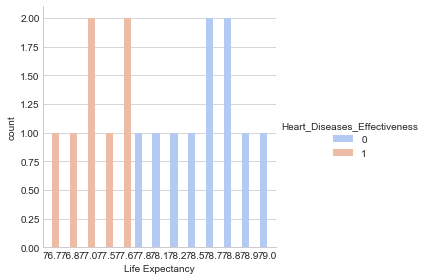

In [29]:
sns.factorplot('Life Expectancy', data=data, hue='Heart_Diseases_Effectiveness',palette='coolwarm', kind="count")

In [30]:
diabetes_dummies = pd.get_dummies(data['Diabetes'])
heart_dummies = pd.get_dummies(data['Heart Diseases'])

diabetes_dummies.head()

,68399,68705,69071,69301,70553,71372,71382,72449,73138,73249,73831,73932,74219,75119,75578,76448,79535
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [31]:
diabetes_dummies.columns = ['dia1','dia2','dia3','dia4','dia5','dia6','dia7','dia8','dia9','dia10','dia11','dia12','dia13','dia14','dia15','dia16','dia17']
heart_dummies.columns = ['hea1','hea2','hea3','hea4','hea5','hea6','hea7','hea8','hea9','hea10','hea11','hea12','hea13','hea14','hea15','hea16','hea17']

In [32]:
X = data.drop(['Diabetes','Heart Diseases','Heart_Diseases_Effectiveness'],axis=1)

In [33]:
dummies = pd.concat([diabetes_dummies,heart_dummies],axis=1)

In [34]:
X = pd.concat([X,dummies],axis=1)

X.head()

,Life Expectancy,Accidental Deaths,Alzheimer's,Assault,Cerebrovascular Diseases,Chronic Liver,Chronic Lower Respiratory,Hypertension,Parkinson's,Suicide,...,hea8,hea9,hea10,hea11,hea12,hea13,hea14,hea15,hea16,hea17
0,76.7,97860,44536,16889,167366,26259,124181,19638,14593,29199,...,0,0,0,0,0,0,0,0,0,1
1,76.8,97900,49558,16765,167661,26552,122009,18073,15682,29350,...,0,0,0,0,0,0,0,0,1,0
2,77.0,101537,53832,20308,163538,27035,123013,19250,16544,30622,...,0,0,0,0,0,0,0,1,0,0
3,77.0,106742,58866,17638,162672,27257,124816,20261,16959,31655,...,0,0,0,0,0,0,1,0,0,0
4,77.6,109277,63457,17732,157689,27503,126382,21940,17997,31484,...,0,0,0,0,0,1,0,0,0,0


In [35]:
Y = data.Heart_Diseases_Effectiveness

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Heart_Diseases_Effectiveness, dtype: int64

In [36]:
X.head()

,Life Expectancy,Accidental Deaths,Alzheimer's,Assault,Cerebrovascular Diseases,Chronic Liver,Chronic Lower Respiratory,Hypertension,Parkinson's,Suicide,...,hea8,hea9,hea10,hea11,hea12,hea13,hea14,hea15,hea16,hea17
0,76.7,97860,44536,16889,167366,26259,124181,19638,14593,29199,...,0,0,0,0,0,0,0,0,0,1
1,76.8,97900,49558,16765,167661,26552,122009,18073,15682,29350,...,0,0,0,0,0,0,0,0,1,0
2,77.0,101537,53832,20308,163538,27035,123013,19250,16544,30622,...,0,0,0,0,0,0,0,1,0,0
3,77.0,106742,58866,17638,162672,27257,124816,20261,16959,31655,...,0,0,0,0,0,0,1,0,0,0
4,77.6,109277,63457,17732,157689,27503,126382,21940,17997,31484,...,0,0,0,0,0,1,0,0,0,0


In [37]:
Y = np.ravel(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

1.0

In [39]:
Y.mean()

0.4117647058823529

In [40]:
coeff_data = DataFrame(list(zip(X.columns, np.transpose(log_model.coef_))))

In [41]:
coeff_data

,0,1
0,Life Expectancy,[-2.7785760050721164e-07]
1,Accidental Deaths,[-0.0011647741169736542]
2,Alzheimer's,[-0.0006265207304380799]
3,Assault,[-0.00011395490415212127]
4,Cerebrovascular Diseases,[0.0010117427565638256]
5,Chronic Liver,[-0.0001754840257778436]
6,Chronic Lower Respiratory,[0.00047212888075164256]
7,Hypertension,[6.812399539012196e-05]
8,Parkinson's,[-0.00010885788859469964]
9,Suicide,[-0.0003141184614714973]


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

log_model2 = LogisticRegression()

log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
class_predict = log_model2.predict(X_test)

print (metrics.accuracy_score(Y_test,class_predict))

1.0
